In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [3]:
def load_data(file_path):
    data = pd.read_csv(file_path)

    data = data.set_index('Date')
    data.index = pd.to_datetime(data.index)

    y=data['forward_return_3']
    X = data.drop('forward_return_3', axis=1)

    return X, y

X_train, y_train = load_data('train_set.csv')



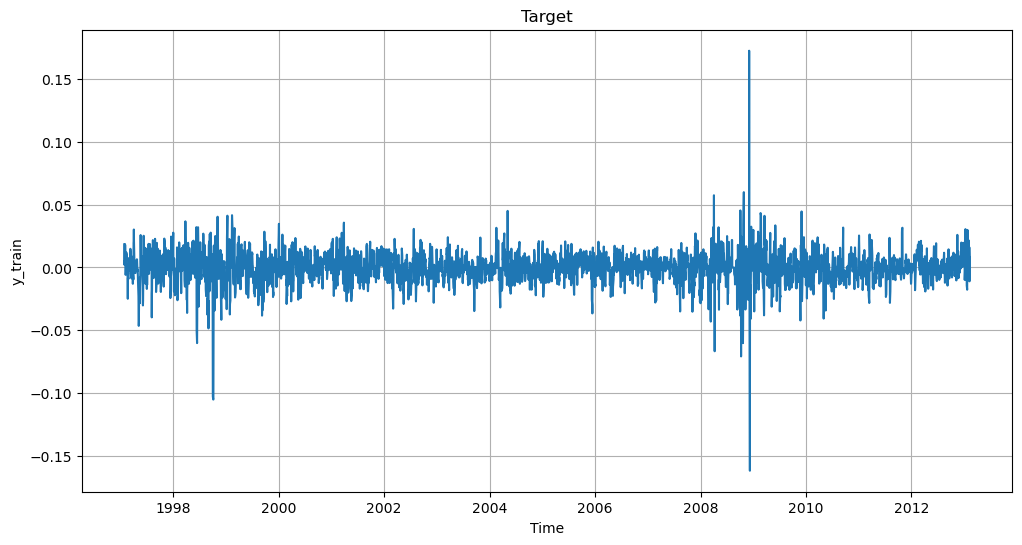

In [4]:
plt.figure(figsize = (12,6))
plt.plot(y_train)
plt.title('Target')
plt.xlabel('Time')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

/Users/ryliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of target')

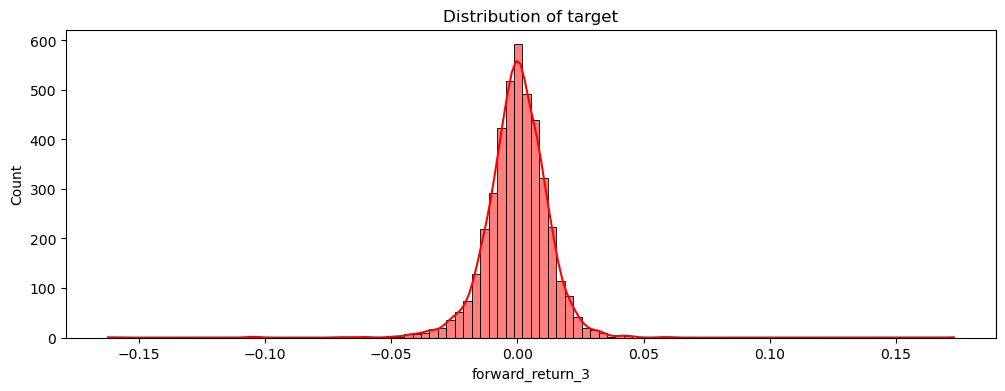

In [5]:
# depict the distribution of target
f, ax = plt.subplots(figsize = (12, 4))
sns.histplot(y_train, bins =100, kde=True, color = 'r', ax =ax)
ax.set_title('Distribution of target')


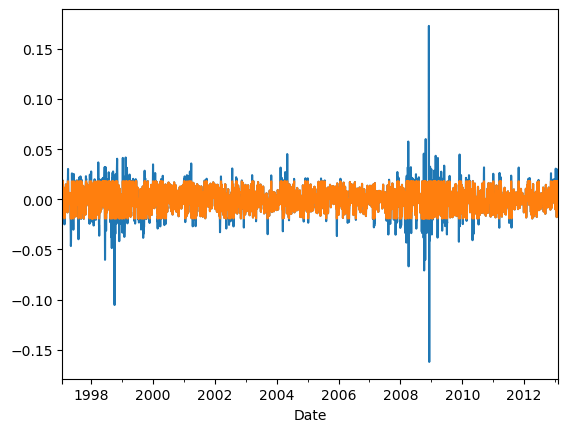

Date
1997-01-27 00:00:00+00:00    0.017941
1997-01-28 00:00:00+00:00    0.002066
1997-01-29 00:00:00+00:00    0.005372
1997-01-30 00:00:00+00:00    0.005832
1997-01-31 00:00:00+00:00    0.017941
                               ...   
2013-02-04 00:00:00+00:00    0.007168
2013-02-05 00:00:00+00:00    0.016060
2013-02-06 00:00:00+00:00   -0.011061
2013-02-07 00:00:00+00:00    0.008091
2013-02-08 00:00:00+00:00   -0.003503
Name: forward_return_3, Length: 4185, dtype: float64

In [6]:
#discard anomalies
def quantile_clip(group):
    group.plot()
    group[group < group.quantile(0.05)] = group.quantile(0.05)
    group[group > group.quantile(0.95)] = group.quantile(0.95)
    group.plot()
    plt.show()
    return group
quantile_clip(y_train)


seemly, the target(3-day forward return) has no significant trend and season. we go to ACF and PACF directly to look over whether it has trends of seasons.

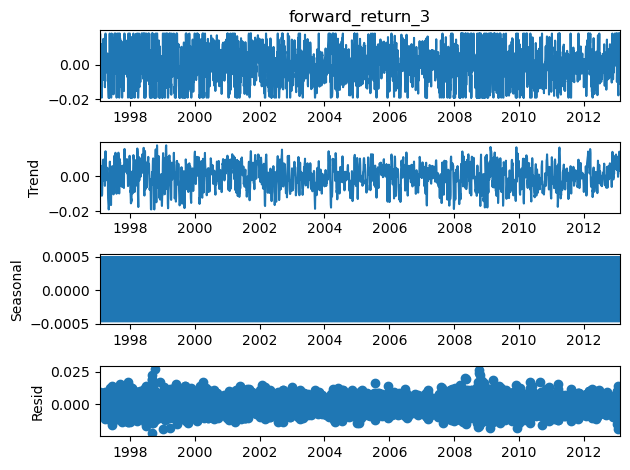

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y_train, model = 'additive')
result.plot()
plt.show()

In [8]:
#stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -14.319427
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


actually, we can see that after we diff the close price, the trend and season is been discarded.

In [9]:
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm

y_acf = sm.tsa.stattools.acf(y_train, nlags=40)
y_acf

array([ 1.00000000e+00,  6.21897555e-01,  3.01520109e-01, -1.63496082e-02,
        7.68223059e-03, -3.09644233e-03, -9.59398041e-03, -7.85369189e-03,
        2.43950826e-02,  3.34745084e-02,  4.89890287e-02,  2.75547147e-02,
        1.99698448e-02, -1.04336686e-02, -2.91185849e-02, -3.30870044e-02,
       -1.98612643e-02, -1.17633137e-02,  6.30191716e-03,  2.62924228e-03,
        1.40207934e-02, -4.23894707e-04,  1.88756970e-03, -1.46927405e-02,
       -7.74388188e-03, -6.20272977e-03,  9.21505937e-03, -1.47137437e-03,
        3.86153975e-03, -8.70625767e-03, -1.35038671e-02, -2.95054516e-02,
       -2.22923491e-02, -5.72535340e-03,  8.02429193e-03,  2.81968846e-02,
        2.47409703e-02,  3.01398570e-02,  1.82426355e-02,  3.68511827e-02,
        4.39625683e-02])

In [10]:
y_pacf = sm.tsa.stattools.pacf(y_train, nlags=40)
y_pacf

array([ 1.00000000e+00,  6.22046192e-01, -1.39101223e-01, -2.38832586e-01,
        2.79086678e-01, -1.01673995e-01, -1.11551816e-01,  1.62481987e-01,
       -9.46751974e-03, -7.65942046e-02,  1.20404281e-01, -4.07489115e-02,
       -4.38032137e-02,  3.72895753e-02, -4.40259394e-02, -6.50016523e-03,
        3.29753958e-02, -3.67863204e-02,  2.99744130e-02, -4.40246611e-03,
       -5.64114866e-03, -9.09417282e-04,  5.17548498e-03, -2.52120896e-02,
        2.19776186e-02,  2.98346763e-03, -1.44780628e-03, -1.44761643e-02,
        1.85576127e-02, -2.00046840e-02, -2.45223564e-02,  2.83679250e-03,
        7.71838232e-03,  6.18578392e-03, -1.54783281e-03,  4.34012270e-02,
       -2.40333572e-02,  1.61310209e-02,  1.32644231e-02,  3.36604103e-02,
        1.13792179e-02])

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


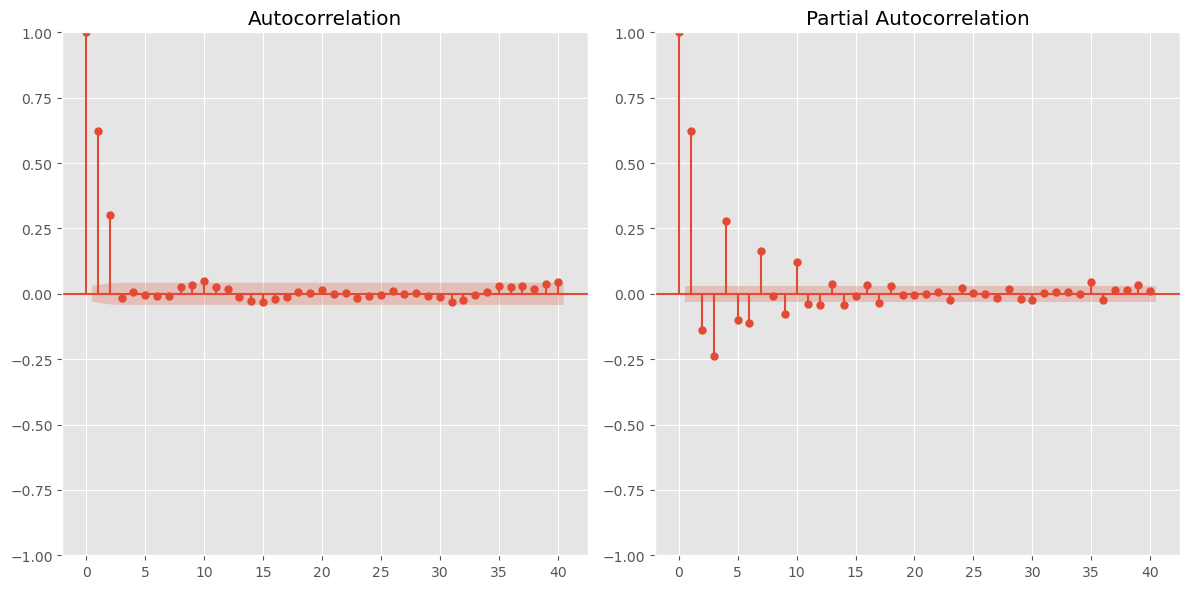

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sm.graphics.tsa.plot_acf(y_train,lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(y_train, lags=40, ax = ax2)

plt.tight_layout()
plt.show()

ACF tails cut off by 2, while pacf has a gradually decreasing trend.Thus, the graphs suggests that an MA(3) model would be appropriate for the time series.

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       forward_return_3   No. Observations:                 4185
Model:                 ARIMA(0, 0, 2)   Log Likelihood               14919.199
Date:                Sun, 21 Jan 2024   AIC                         -29830.398
Time:                        13:50:03   BIC                         -29805.041
Sample:                    01-27-1997   HQIC                        -29821.430
                         - 02-08-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.805e-05      0.000      0.217      0.828      -0.000       0.001
ma.L1          0.8317      0.009     89.381      0.000       0.813       0.850
ma.L2          0.6958      0.010     69.820      0.0

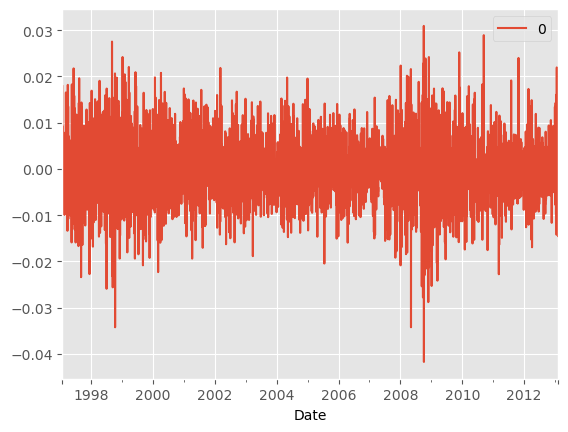

                 0
count  4185.000000
mean      0.000001
std       0.006851
min      -0.041729
25%      -0.004093
50%       0.000078
75%       0.004110
max       0.030910


/Users/ryliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


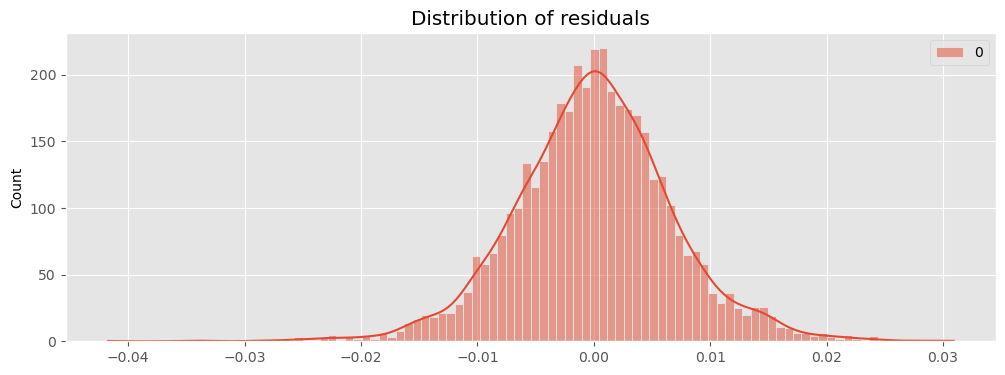

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order = (0,0,2)).fit()
print(model.summary())

#plot the residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

#plot the density of residuals
f, ax = plt.subplots(figsize = (12, 4))
sns.histplot(residuals, bins =100, kde=True, color = 'r', ax =ax)
ax.set_title('Distribution of residuals')

#summary stats of residuals
print(residuals.describe())

/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/ryliu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4185
Model:               SARIMAX(1, 0, 2)   Log Likelihood               14925.631
Date:                Sun, 21 Jan 2024   AIC                         -29843.262
Time:                        13:54:45   BIC                         -29817.905
Sample:                    01-27-1997   HQIC                        -29834.294
                         - 02-08-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0816      0.021     -3.903      0.000      -0.123      -0.041
ma.L1          0.8758      0.013     69.386      0.000       0.851       0.901
ma.L2          0.7178      0.010     71.061      0.0

/Users/ryliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


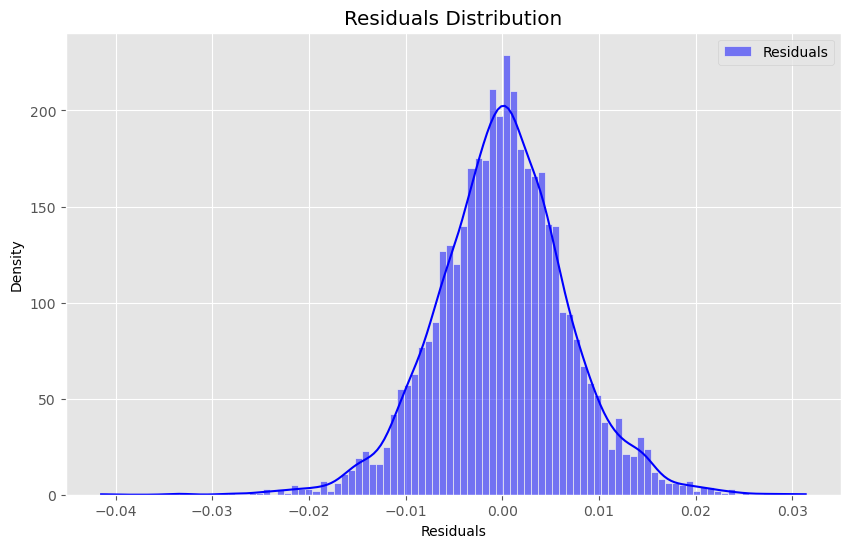

In [18]:
import pmdarima as pm 

model = pm.auto_arima(y_train, seasonal=False, stepwise=True, suppress_warnings=False)
print(model.summary())
y_pred = model.predict_in_sample()

residuals = y_train - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=100, kde=True, color='b', label='Residuals')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()



## checking  the residuals

to see if the variance of residuals is constant (namely, homoscedasticity)

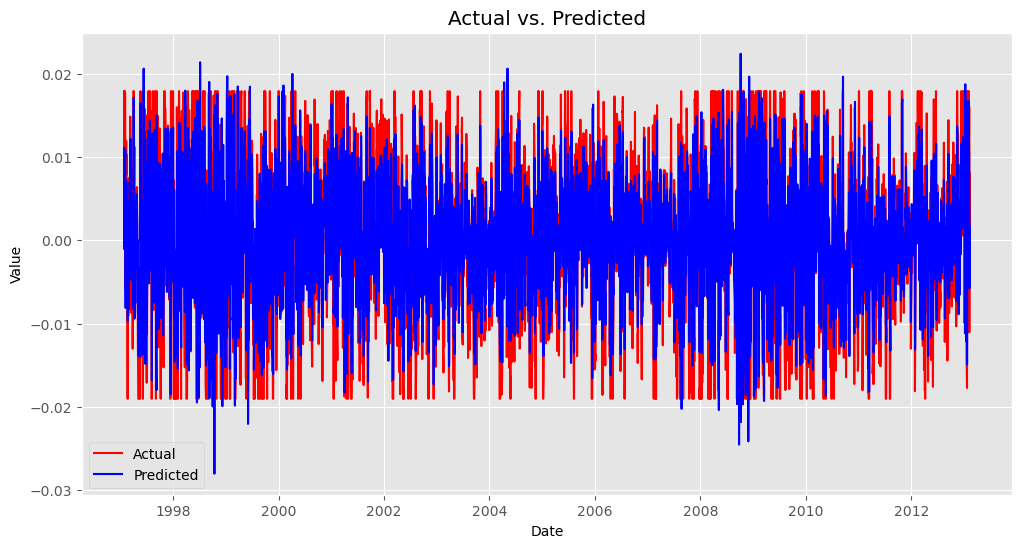

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Actual', color='r')
plt.plot(y_train.index, y_pred, label='Predicted', color='b')
plt.title('Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


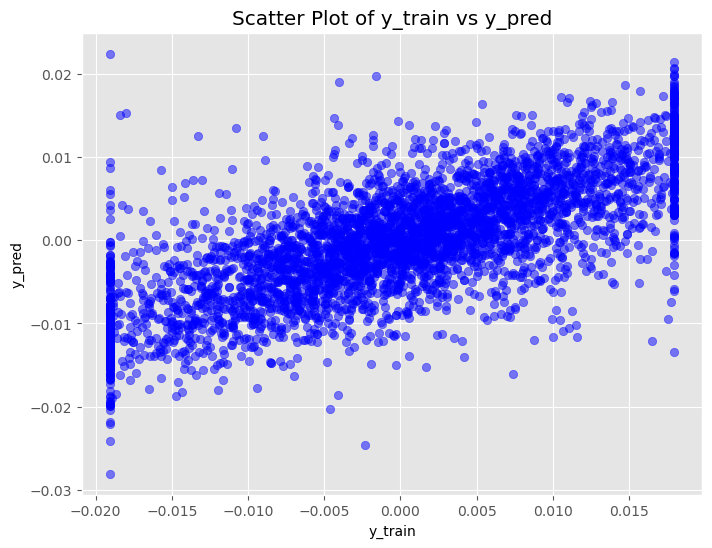

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.5, color='b')
plt.title('Scatter Plot of y_train vs y_pred')
plt.xlabel('y_train')
plt.ylabel('y_pred')
plt.grid(True)
plt.show()

In the vicinity of extreme points, predictions become unstable, but ARIMA can fit y_train within the in-sample range.